<h2>News Classification using Gensim <a href='https://www.kaggle.com/datasets/shubh0799/fake-news'>Fake or Real News Dataset Link (Kaggle)</a></h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/fake_or_real_news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df["label_num"] = df.label.map({
    "FAKE":0,
    "REAL":1
})

In [5]:
df

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


In [6]:
text = []
labels = []

In [7]:
count = 0
for i in range(6335):
    if count < 500:
        if df["label_num"][i] == 0:
            text.append(df["text"][i])
            labels.append(0)
            count += 1
count = 0
for i in range(6335):
    if count < 500:
        if df["label_num"][i] == 1:
            text.append(df["text"][i])
            labels.append(1)
            count += 1            

In [8]:
len(labels)

1000

In [9]:
df = pd.DataFrame({
    "Text":text,
    "Label":labels
})

In [10]:
df

,Text,Label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
3,"\nI’m not an immigrant, but my grandparents ...",0
4,"Share This Baylee Luciani (left), Screenshot o...",0
...,...,...
995,"Malone, New York (CNN) After a massive, more-t...",1
996,Toward the end of our meeting with President O...,1
997,"Of late, Bernie Sanders has been under assault...",1
998,President Obama’s decision to expand the U.S. ...,1


In [36]:
df.Label.value_counts()

Label
0    500
1    500
Name: count, dtype: int64

In [11]:
import spacy
import gensim.downloader as api

In [12]:
nlp = spacy.load("en_core_web_lg")

In [13]:
wv = api.load("glove-twitter-25")

In [14]:
def preprocess_and_vectorize(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered_tokens.append(token.lemma_)
    return wv.get_mean_vector(filtered_tokens)    

In [15]:
df['vector'] = df.Text.apply(lambda text: preprocess_and_vectorize(text))

In [16]:
df

,Text,Label,vector
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[0.01888134, 0.074573636, -0.06843061, -0.0010..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[-0.015159922, 0.053646076, -0.053345207, 0.00..."
2,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[0.022967573, 0.090363964, -0.102864526, -0.03..."
3,"\nI’m not an immigrant, but my grandparents ...",0,"[-0.046866167, 0.05311523, -0.059848927, 0.011..."
4,"Share This Baylee Luciani (left), Screenshot o...",0,"[-0.025820013, 0.07851392, 0.024902748, -0.001..."
...,...,...,...
995,"Malone, New York (CNN) After a massive, more-t...",1,"[-0.04550738, 0.08775749, -0.039798554, -0.003..."
996,Toward the end of our meeting with President O...,1,"[0.017781127, 0.078981794, -0.096449636, 0.002..."
997,"Of late, Bernie Sanders has been under assault...",1,"[0.0047943457, 0.07886963, -0.10558108, -0.015..."
998,President Obama’s decision to expand the U.S. ...,1,"[-0.011515908, 0.07908856, -0.12376117, -0.013..."


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.Label,
    test_size=0.2,
    random_state=2022
)

In [20]:
import numpy as np

In [21]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [25]:
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(x_train_2d)
scaled_test_embed = scaler.transform(x_test_2d)

In [26]:
clf = GradientBoostingClassifier()
clf.fit(scaled_train_embed,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [27]:
y_pred = clf.predict(scaled_test_embed)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        86
           1       0.87      0.80      0.83       114

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200



In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[72, 14],
       [23, 91]])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn

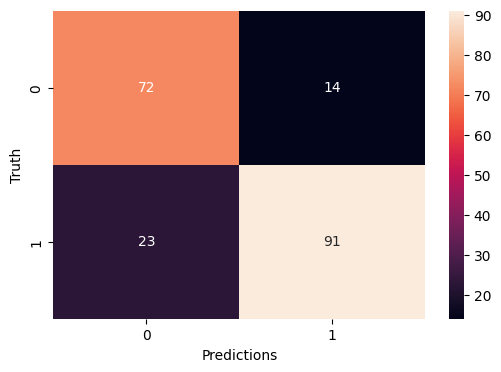

In [35]:
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()